In [56]:


import pandas as pd
import numpy as np 
import scipy as py

import matplotlib.pyplot as plt    # Gràfics
from matplotlib import style
import seaborn as sns

                                  # neccessito per processar les dades
from sklearn import preprocessing
from scipy.stats import pearsonr    
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

from math import sqrt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor



## Configuració warnings

import warnings
warnings.filterwarnings('ignore')


huston  = pd.read_csv("housing data (1).csv",sep=',', names=["CRIM", "ZN", "INDUS", "CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
                                # carrego el dataset incluint els noms de les columnes tal com diu el arxiu adjunt
#df=huston
huston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


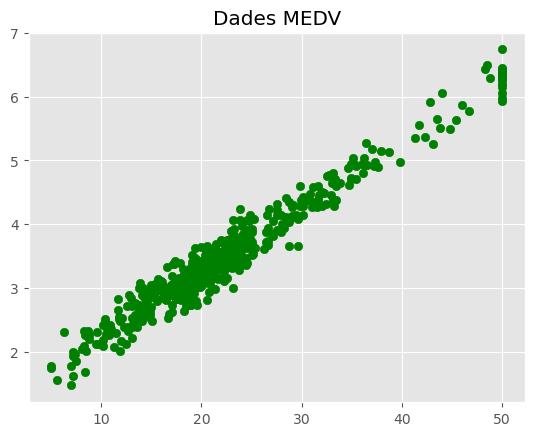

In [262]:

medv_x= huston['MEDV'].to_numpy()
x=medv_x


def f(x):                                             # utilitzo funció # funció f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano 
    np.random.seed(1)                                 
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y
                                                          
y = f(x)                                              # faig servir la funció que he generat i mostro gràfic
                        
plt.title('Dades MEDV');
plt.scatter(x,y,label='data', color='green')

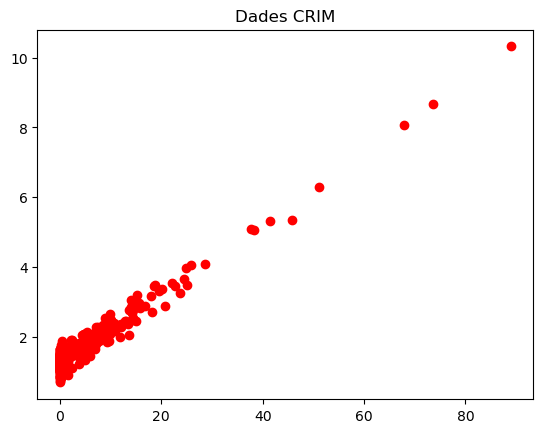

In [57]:
crim_x = huston['CRIM'].to_numpy()       #bobo
#y = huston['TAX'].values

x=crim_x


def f(x):                                             # utilitzo funció # funció f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano 
    np.random.seed(1)                                 
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y
                                                          
y = f(x)                                              # faig servir la funció que he generat i mostro gràfic
                        

plt.scatter(x,y,label='data', color='red')
plt.title('Dades CRIM');

In [ ]:
#El MSE se calcula mediante la suma del cuadrado del error de predicción,
#que es la salida real menos la salida prevista y luego se divide por el número de puntos de datos. 

In [48]:
# Comparar

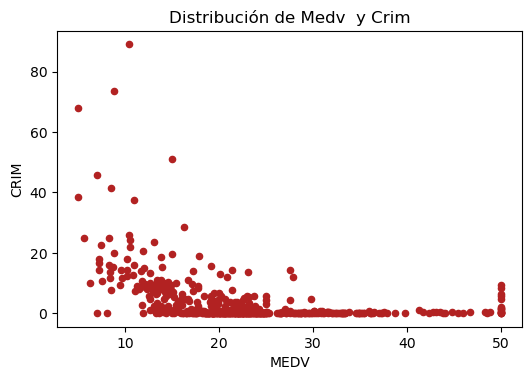

In [58]:
# Gràfic

fig, ax = plt.subplots(figsize=(6, 3.84))

huston.plot(
    x    = 'MEDV',
    y    = 'CRIM',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Medv  y Crim');

In [59]:
# Correlació lineal entre les dos variables

corr_test = pearsonr(x = huston['MEDV'], y =  huston['CRIM'])
print("Coeficient de correlació de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficient de correlació de Pearson:  -0.3883046085868114
P-value:  1.1739870821941874e-19


In [234]:
#El gráfic i el coef correlació tenen una relació lineal,
#significativa (r =-0.3883046085868114) i (p-value = 1.1739870821941874e-19) = 0,00000000000000000017 per tant p<0.05
# i per tant té sentit intentar generar un model de regresió lineal
#per  predir  si el preu de les vivendes te relació amb la criminalitat de Houston.




In [60]:
#  train y test  divideixo les dades

X = huston[['MEDV']]
y = huston['CRIM']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                       
                                    )



modelo = LinearRegression()   #creo model
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [51]:
# printo la informació extreta del model 

print("Intercept:", modelo.intercept_)  #ordenada punt on intercepta am la linia


print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))   #coef de correlació
print("Coeficiente de determinación R^2:", modelo.score(X, y))          #R^2



#3 R2 medeix quan bé , un model de regresió s'ajusta a les dades reals.
# es  una mesura de la precisió general del model.
# R al quadrat es coneix com el coeficient de determinació.

##coef de correlació= Ens diu la intensidat de la relació lineal entre dos variables en un análisis de correlació.

Intercept: [12.06307916]
Coeficiente: [('MEDV', -0.3791511466943768)]
Coeficiente de determinación R^2: 0.1503689989568504


In [29]:

# evaluo la capacitat predictiva amb el grup de dades test

In [61]:
# Error de test del model 

prediccions = modelo.predict(X = X_test)
print(prediccions[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediccions,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


# RMSE ( root mean square error )ens dona la diferencia entre los resultados reals iels resultats calculados del nostre model

[[9.40902113]
 [6.29998173]
 [3.94924462]]

El error (rmse) de test es: 6.349368965544373


In [31]:
# Divisió de dades en train y test

X = huston[['MEDV']]
y = huston['CRIM']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                       
                                    )

In [63]:

 #Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     68.98
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.54e-15
Time:                        11:56:12   Log-Likelihood:                -1426.8
No. Observations:                 404   AIC:                             2858.
Df Residuals:                     402   BIC:                             2866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0631      1.099     10.980      0.0

In [64]:
# Intervals de confianÇa per els coeficients del model

modelo.conf_int (alpha=0.05); #agafem 0.05 valor de referencia  el fem servir  per hipotesi nula o acceptar alternativa
#modelo.conf_int(alpha=0.05


In [35]:
# Prediccions amb interval de confiança del 95%

prediccions = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
prediccions.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6.563675,0.566719,5.449572,7.677778,-9.136618,22.263968
1,6.293323,0.542249,5.227324,7.359321,-9.403631,21.990276
2,6.394705,0.551292,5.310929,7.478480,-9.303466,22.092875
3,4.367062,0.414290,3.552616,5.181508,-11.314817,20.048940


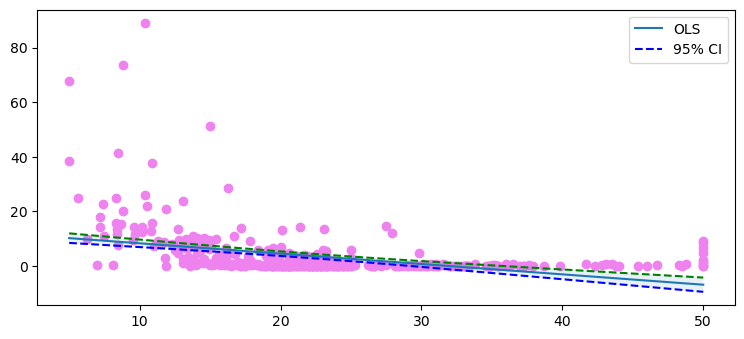

In [65]:
# Prediccions amb un interval de confianÇa del 95%  #train

prediccions = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
prediccions['x'] = X_train[:, 1]
prediccions['y'] = y_train
prediccions = prediccions.sort_values('x')


                       # Gràfic

fig, ax = plt.subplots(figsize=(9,3.84 ))

ax.scatter(prediccions['x'], prediccions['y'], marker='o', color = "violet")
ax.plot(prediccions['x'], prediccions["mean"], linestyle='-', label="OLS")
ax.plot(prediccions['x'], prediccions["mean_ci_lower"], linestyle='--', color='blue', label="95% CI")
ax.plot(prediccions['x'], prediccions["mean_ci_upper"], linestyle='--', color='green')
ax.fill_between(prediccions['x'], prediccions["mean_ci_lower"], prediccions["mean_ci_upper"], alpha=0.1)
ax.legend();

In [66]:
# Error de test del model  #test

X_test = sm.add_constant(X_test, prepend=True)
prediccions = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediccions,
        squared = False
       )
print("")
print(f"El error (rmse) de test es  el valor : {rmse}")

 
# les prediccions  s´allunyen el valor real (rmse)


El error (rmse) de test es  el valor : 6.349368965544371
